# Project 3 Collaborative Filtering

## Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by the following equation:
$$Sparsity = \frac{Total number of available ratings}{Total number of possible ratings}$$

In [2]:
# import data
import numpy as np
import csv
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) #加载数据部分
        label = tmp[0,0:].astype(np.str) #加载类别标签部分
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label #返回array类型的数据

ratings, rate_label = loadCSVfile('ratings.csv')
tags, tag_label = loadCSVfile('tags.csv')
links, link_label = loadCSVfile('links.csv')
movies, movie_label = loadCSVfile('movies.csv')

In [3]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 4)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [4]:
def sparsity(data):
    rate = 0
    total = len(data)
    for i in data:
        if i.startswith("0"):
            pass
        else:
            rate+=1
    return float(rate)/float(total)

sparsity(ratings[:,2])

0.9864135824507121

## Question 2:
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

In [5]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,2])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_counter])
rating_counter

Counter({'0.5': 1370,
         '1.0': 2811,
         '1.5': 1791,
         '2.0': 7551,
         '2.5': 5550,
         '3.0': 20047,
         '3.5': 13136,
         '4.0': 26818,
         '4.5': 8551,
         '5.0': 13211})

Text(0.5,1,'Frequency of rating values')

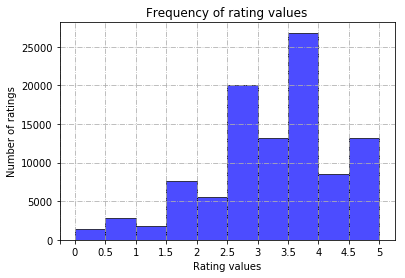

In [6]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

## Question 3:
Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

In [7]:
movie_rate = Counter(ratings[:,1])
movie_rate_dec = sorted(movie_rate.items(),key = lambda item: item[1],
                 reverse = True)
movie_y = [i[1] for i in movie_rate_dec]
movie_x = [i[0] for i in movie_rate_dec]

Text(0.5,1,'Distribution of the number of ratings received among movies')

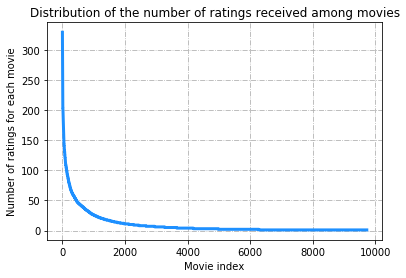

In [8]:
length = len(movie_y)
plt.plot(range(1,length+1),movie_y,color='dodgerblue',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Question 4:
Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

In [9]:
user_rate = Counter(ratings[:,0])
user_rate_dec = sorted(user_rate.items(),key = lambda item: item[1],
                      reverse = True)
user_y = [i[1] for i in user_rate_dec]
user_x = [i[0] for i in user_rate_dec]

Text(0.5,1,'Distribution of ratings among users')

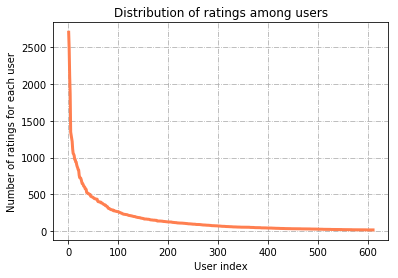

In [10]:
length = len(user_y)
plt.plot(range(1,length+1),user_y,color='coral',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('User index')
plt.ylabel('Number of ratings for each user')
plt.title('Distribution of ratings among users')

## Question 5:
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

#### There are so many movies but the number of ratings are nothing comparing to that of movies. And there are so many movies that only one or two ratings are received. 

## Question 6:
Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram. 

In [11]:
# Calculate the variance of ratings for each movie
def get_var(data):
    length = data.shape[0]
    d = {}
    d_key = set(data[:,0])
    for i in d_key:
        li = []
        for j in range(length):
            if i == data[j,0]:
                li.append(float(data[j,1]))
        d_var = np.var(li)
        d[i] = d_var
    return d

rating_var_dict = get_var(ratings[:,1:3])

In [12]:
# Compute the number of movies in each variance interval
import math
def get_interval(var_dict):
    max_value = max(var_dict.values())
    interval = np.arange(0,float(float(math.ceil(max_value*2))/2+0.5),0.5)
    length = len(interval)
    counter = {}
    for i in interval[:-1]:
        counter[i] = 0
    for item in var_dict.items():
        for i in range(length-1):
            if item[1]>=interval[i] and item[1]<interval[i+1]:
                counter[interval[i]]+=1
    return counter, interval

rating_var_count,interval = get_interval(rating_var_dict)
print('The number of ratings to each interval of variance:')
rating_var_count

The number of ratings to each interval of variance:


{0.0: 5996,
 0.5: 2313,
 1.0: 990,
 1.5: 265,
 2.0: 100,
 2.5: 22,
 3.0: 27,
 3.5: 4,
 4.0: 4,
 4.5: 1,
 5.0: 2}

Text(0.5,1,'Variance of the rating values rerceived by each movie')

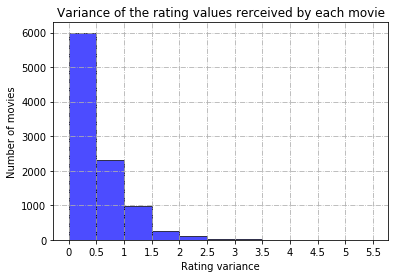

In [13]:
# show time
plt.bar(rating_var_count.keys(), rating_var_count.values(), 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks(interval-0.25,(u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5',u'5.5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating variance')
plt.ylabel('Number of movies')
plt.title('Variance of the rating values rerceived by each movie')

## Question 7:
Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$

$$\mu_u = \frac{\sum_{k = I_u[0]}^{I_u[-1]} r_{uk}}{len(I_u)}$$ 

## Question 8:
In plain words, explain the meaning of $I_u \bigcap I_v$ . Can $I_u \bigcap I_v = \phi$ (Hint: Rating matrix R is sparse).

## Question 9:
Can you explain the reason behind mean-centering the raw ratings $(r_{uj}-\mu_v)$ in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function)

## Question 10:
Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [14]:
# define rating matrix
movie_num = len(set(movies[:,0]))
user_num = len(set(ratings[:,0]))
movie_id = movies[:,0]
user_id = list(set(ratings[:,0]))
user_id.sort(key=list(ratings[:,0]).index)
R_matrix = np.zeros([user_num,movie_num])

# put ratings into the R_matrix
total = len(ratings[:,0])
i,j = 0,0
for k in range(total):
    tag = 0
    while (i < user_num):
        if (j == movie_num):
            i += 1
            j = 0
        else:
            pass
        while (j < movie_num and i < user_num):
            if (user_id[i] == ratings[k,0] and movie_id[j] == ratings[k,1]):
                R_matrix[i][j] = float(ratings[k,2])
                tag = 1
                break
            else:
                j += 1
        if (tag):
            break
        else:
            pass
R_matrix

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [15]:
# construct k-NN filter
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import os

file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
 
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=2, min_k=1, sim_options=sim, verbose=True)
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0107  1.0131  1.0243  1.0142  1

{'fit_time': (1.29758882522583,
  1.3285250663757324,
  1.5545010566711426,
  1.5456202030181885,
  1.8489654064178467,
  1.780120849609375,
  1.7321264743804932,
  1.8839256763458252,
  1.6004300117492676,
  1.5623962879180908),
 'test_mae': array([0.78314938, 0.77724594, 0.79196243, 0.78051737, 0.78764684,
        0.78489306, 0.77893319, 0.77625168, 0.78900848, 0.78423238]),
 'test_rmse': array([1.01069089, 1.01309255, 1.0243045 , 1.01421636, 1.01679021,
        1.0191504 , 1.01164318, 1.00546101, 1.02304981, 1.0159479 ]),
 'test_time': (0.6590895652770996,
  0.5417532920837402,
  0.640742301940918,
  0.6723756790161133,
  1.0362069606781006,
  0.9620368480682373,
  0.9834067821502686,
  0.9577264785766602,
  0.8368160724639893,
  0.9501419067382812)}

In [16]:
# try k-NN filter on different k
mae = []
rmse = []
sim = {'name':'pearson','user_based':True}
for k in range(2,102,2):
    knn = KNNWithMeans(k=k, min_k=1, sim_options=sim, verbose=True)
    result_dict = cross_validate(knn, data, measures=['RMSE', 'MAE'], 
                                 cv=10, verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0171  1.0167  1.0155  1.0179  1

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8928  0.8817  0.8961  0.9046  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8917  0.8965  0.8862  0.8993  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8876  0.8811  0.8920  0.8780  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8992  0.8923  0.8880  0.8914  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8979  0.8798  0.8821  0.8797  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8777  0.8915  0.8883  0.8878  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9022  0.8838  0.8760  0.8921  0

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8835  0.8928  0.9013  0.9024  0

Text(0.5,1,'MAE against k (k-NN filter)')

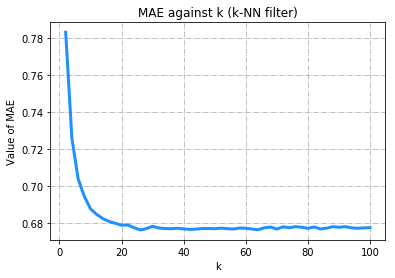

In [17]:
# plot 
x = range(2,102,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k (k-NN filter)')

Text(0.5,1,'RMSE against k (k-NN filter)')

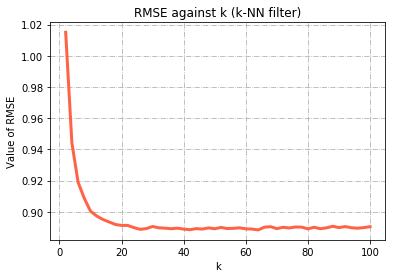

In [18]:
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (k-NN filter)')

## Question 11:
Use the plot from question 10, to find a 'minimum k'. Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.

The steady state values of MAE is: 0.6831213807927355


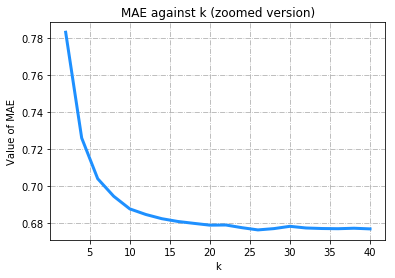

In [19]:
#  zoom MAE
plt.plot(x[:20],mae[:20],color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k (zoomed version)')
print('The steady state values of MAE is:',np.mean(mae[:-10]))

The steady state of RMSE is: 0.8959848131970525


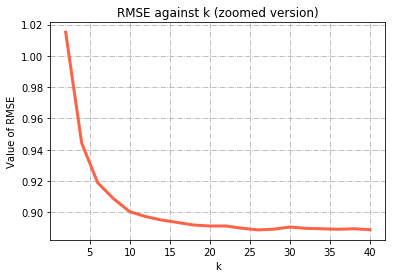

In [20]:
# zoom RMSE
plt.plot(x[:20],rmse[:20],color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (zoomed version)')
print('The steady state of RMSE is:',np.mean(rmse[:-10]))

#### The min stable state is when k = 20

## Question 12+13+14:
Design a k-NN collaborative filter to predict the ratings of the movies in the \[popular movie trimmed, unpopular movie trimmed, high variance movie trimmed\] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimming

In [21]:
# Define a function for Popular movie trimming

#testset_sort = sorted(testset,key=lambda x:int(x[1]))
#count_sort = sorted(Counter([x[1] for x in testset_sort]).items(),
 #                   key=lambda item:int(item[1]))
def PMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] > 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
PMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2)]

In [22]:
# train the dataset using Popular movie trimming
from surprise.model_selection import KFold
from surprise import accuracy

# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = PMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0010
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0255
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0012
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0104
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0355
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0200
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0319
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0334
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0010
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0125
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9180
Computing 

Done computing similarity matrix.
RMSE: 0.8572
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8684
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8476
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8438
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8623
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8530
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8595
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8657
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8791
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8697
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8566
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8558
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8378
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8714
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8695
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8530
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8674
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8524
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8644
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8617
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8641
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.85

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8650
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8623
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8505
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8668
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8547
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8619
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8627
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8674
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8424
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8567
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8637
Computing 

RMSE: 0.8534
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8629
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8550
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8556
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8575
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8604
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8674
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8553
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8513
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8748
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8494
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.84

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8419
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8537
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8563
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8672
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8471
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8586
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8609
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8775
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8377
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8502
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8608
Computing 

The minimum average value of RMSE is: 0.854249737911613


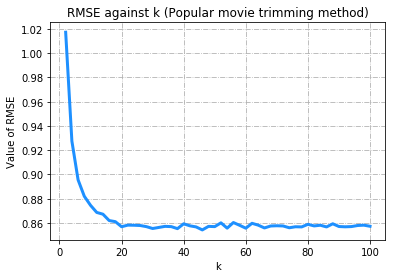

In [23]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming

In [24]:
# define a function for Unpopular movie trimming
def UMT(testset):    
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter = list(filter(lambda x:x[1] <= 2,counter))
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

# test PMT function
a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5)]
UMT(a)

[('2', '2', 2), ('2', '3', 5), ('6', '3', 5)]

In [25]:
# train the dataset using unpopular movie trimming
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = UMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0519
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0222
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0223
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0033
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0241
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0074
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0164
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9927
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0259
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0253
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9766
Computing 

Done computing similarity matrix.
RMSE: 0.9490
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9338
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9796
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9501
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9528
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9632
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9649
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9547
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9429
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9528
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9424
Computing the pearson similarity matrix...
Done compu

RMSE: 0.9455
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9630
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9674
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9445
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9856
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9451
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9616
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9620
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9246
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9650
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.95

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9703
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9879
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9642
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9740
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9567
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9564
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9667
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9531
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9388
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9634
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9770
Computing 

RMSE: 0.9599
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9415
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9585
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9678
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9297
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9510
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9598
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9514
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9589
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9355
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9579
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.94

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9693
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9456
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9267
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9461
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9573
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9581
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9477
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9375
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9836
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9404
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9597
Computing 

The minimum average value of RMSE is: 0.9504144670339588


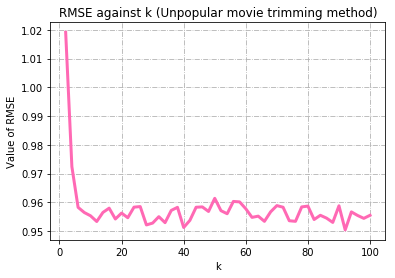

In [26]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='hotpink',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming

In [27]:
# Define a function for high variance movie trimming method
def HVMT(testset):
    counter = [x for x in Counter([x[1] for x in testset]).items()]
    count_filter1 = list(filter(lambda x:x[1] >= 5,counter))
    var_list = list(get_var(np.array(testset)[:,1:3]).items())
    count_filter2 = list(filter(lambda x:x[1] >= 2,var_list))
    count_filter = list(set([x[0] for x in count_filter1]).intersection(set([y[0] for y in count_filter2])))
    #count_filter = list([x[0] for x in count_filter1 if x[0] in [y[0] for y in count_filter2]])
    testset_trim = list(filter(lambda x:x[1] in [y[0] for y in count_filter],
                           testset))
    return testset_trim

a = [('0','1',4),('0','1',3),('2','1',2),('2','2',2),('2','3',5),('6','3',5),
    ('0','1',100),('0','1',20),('5','3',5),('6','3',5)]
HVMT(a)

[('0', '1', 4), ('0', '1', 3), ('2', '1', 2), ('0', '1', 100), ('0', '1', 20)]

In [28]:
# train the dataset using high variance movie trimming method
kf = KFold(n_splits=10)

# Construct a knn filter
sim = {'name':'pearson','user_based':True}
rmse = []
for k in range(2,102,2):
    knn = KNNWithMeans(k=k,min_k=1,sim_options=sim,verbose=True)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        knn.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = knn.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0398
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0222
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7465
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8585
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9799
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0456
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8307
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0614
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9688
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9701
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9305
Computing 

RMSE: 0.8131
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9001
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7960
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8212
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8339
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6311
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9154
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8256
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7916
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7188
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8344
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.82

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8483
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8267
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8605
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7642
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7278
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7897
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7273
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7303
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8120
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7156
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8047
Computing 

Done computing similarity matrix.
RMSE: 0.7179
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7023
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0276
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7518
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8473
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8867
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8055
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8882
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7496
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6480
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8312
Computing the pearson similarity matrix...
Done compu

RMSE: 0.8880
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7097
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8176
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9758
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8114
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8659
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8628
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7477
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9286
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8886
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7745
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.64

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7569
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9003
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7775
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7824
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7684
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.6984
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8069
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7430
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.7926
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8812
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8862
Computing 

The minimum average of RMSE is: 0.7663371126019596


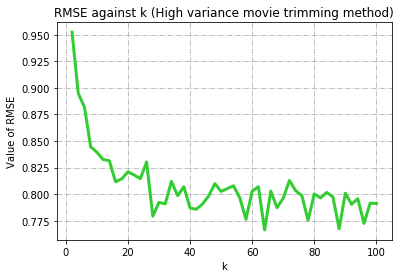

In [29]:
# show time (plot)
x = range(2,102,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average of RMSE is:',min(rmse))

## Question 15:
Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the k found inn question 11. For each of the plots, also report the area under the curve (AUC) value.

In [30]:
# define plot drawing
from sklearn import metrics
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve

def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = metrics.auc(fpr,tpr)

    ax.plot(fpr, tpr, linewidth=3,color='deepskyblue',label= 'area under curve = %0.4f' % roc_auc)
    #color='coral'
    
    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)       

#### Here we assume the person likes the movie, of which the label is 1 when the rating is equal to the threshold.

#### In question 10 we find when k = 20, the system tends to be stable, so we use k = 20 here.

Computing the pearson similarity matrix...
Done computing similarity matrix.


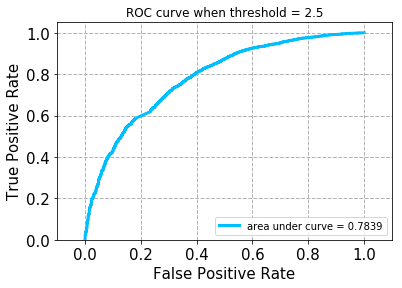

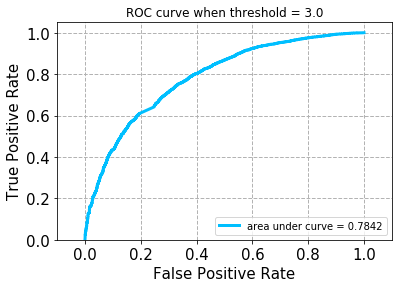

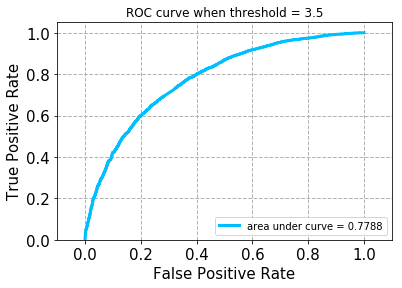

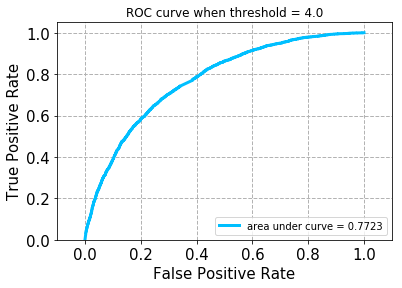

In [31]:
# Define a func to get ground_truth
def get_labels(predictions,threshold):
    #y_pred = list(map(lambda x:0 if x[3] < threshold else 1, predictions))
    #y_true = list(map(lambda x:0 if x[2] < threshold else 1, predictions))
    y_true, y_pred = [], []
    for u, i, r_real, r_pred, misc in predictions:
        y_true.append(threshold <= r_real)
        y_pred.append(r_pred)
    return y_pred, y_true

# Train the binary dataset
threshold = [2.5,3,3.5,4]
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=True)
trainset, testset = train_test_split(data, test_size=.1)
predictions = knn.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true=y_true, y_score=y_pred,pos_label=1)
    #plt.plot(fpr,tpr)
    plot_roc(fpr,tpr)
    plt.title('ROC curve when threshold = %2.1f' % thresh)

## Question 16:
Is the optimization problem given by equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem.

## Question 17:
Design a NNMF-based collaborative filter to predict the ratings of the momvies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 inn step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the aberage RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter. 

In [32]:
from surprise import NMF

mae = []
rmse = []

for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    result_dict = cross_validate(nmf, data, measures=['RMSE', 'MAE'], cv=10, 
                                 verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.1491  1.1473  1.1463  1.1495  1.1496  1.1403  1.1237  1.1310  1.1341  1.1432  1.1414  0.0085  
MAE (testset)     0.9654  0.9636  0.9655  0.9662  0.9678  0.9585  0.9422  0.9511  0.9562  0.9616  0.9598  0.0076  
Fit time          3.99    3.91    3.92    3.81    3.86    3.84    3.88    3.99    4.21    3.97    3.94    0.11    
Test time         0.07    0.06    0.06    0.05    0.04    0.12    0.05    0.05    0.06    0.05    0.06    0.02    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0556  1.0230  1.0384  1.0191  1.0404  1.0182  1.0268  1.0429  1.0441  1.0405  1.0349  0.0118  
MAE (testset)     0.8611  0.8355  0.8512  0.8322  0.8477  0.8284  0.8399  0.8522  0.8

Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9231  0.9307  0.9271  0.9345  0.9291  0.9305  0.9268  0.9394  0.9229  0.9301  0.9294  0.0047  
MAE (testset)     0.6971  0.7016  0.7009  0.7065  0.7041  0.6998  0.6968  0.7084  0.6967  0.6964  0.7008  0.0041  
Fit time          9.24    8.99    9.16    9.31    9.00    8.95    9.04    8.92    8.97    9.02    9.06    0.12    
Test time         0.05    0.05    0.06    0.04    0.06    0.07    0.12    0.08    0.05    0.06    0.06    0.02    
Evaluating RMSE, MAE of algorithm NMF on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9359  0.9392  0.9326  0.9390  0.9146  0.9380  0.9166  0.9387  0.9272  0.9411  0.9323  0.0092  
MAE (testset)     0.7093  0.7064  0.7008  0.7065  0.6896  0.7094  0.6958  0.7082  0.6

Text(0.5,1,'MAE against #k of latent factors (NNMF filter)')

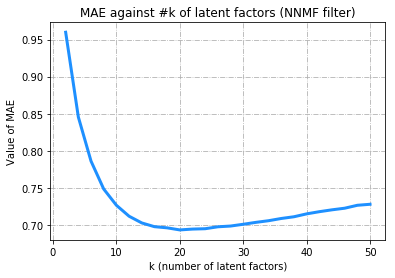

In [33]:
# plot 
x = range(2,52,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of MAE')
plt.title('MAE against #k of latent factors (NNMF filter)')

Text(0.5,1,'RMSE against #k of latent factors (NNMF filter)')

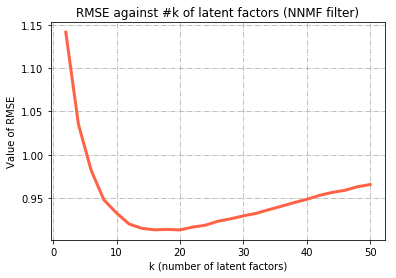

In [34]:
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against #k of latent factors (NNMF filter)')

## Question 18:
Use the plot from question 17, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum avaerage RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?

In [35]:
# Find the optimal k and min value
K_rmse = range(2,52,2)[rmse.index(min(rmse))]
K_mae = range(2,52,2)[mae.index(min(mae))]
min_rmse = min(rmse)
min_mae = min(mae)
print('The optimal k for RMSE is:',K_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',K_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 20
The minimum average RMSE value is: 0.9131984342180456
The optimal k for MAE is: 20
The minimum average MAE value is: 0.6932127173998259


In [36]:
# Find out the number of genres
movies_genre = [x[2] for x in movies]
genres = [x.split('|') for x in movies_genre]
genres = set([y for x in genres for y in x])
print('The number of genres is:',len(genres))

The number of genres is: 20


## Question 19+20+21:
Design a NNMF collaborative filter to predict the ratings of the movies in \[ popular movie trimmed, unpopular movie trimmed, high variance movie trimmed \] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the acerage RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimmed method

In [37]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        nmf.fit(trainset)
        testset_trim = PMT(testset)
        predictions = nmf.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 1.1310
RMSE: 1.1257
RMSE: 1.1461
RMSE: 1.1311
RMSE: 1.1139
RMSE: 1.1458
RMSE: 1.1594
RMSE: 1.1420
RMSE: 1.1362
RMSE: 1.1473
RMSE: 1.0169
RMSE: 1.0056
RMSE: 1.0202
RMSE: 1.0219
RMSE: 1.0057
RMSE: 1.0084
RMSE: 1.0290
RMSE: 1.0109
RMSE: 1.0155
RMSE: 1.0149
RMSE: 0.9477
RMSE: 0.9393
RMSE: 0.9477
RMSE: 0.9382
RMSE: 0.9471
RMSE: 0.9442
RMSE: 0.9525
RMSE: 0.9627
RMSE: 0.9539
RMSE: 0.9429
RMSE: 0.9122
RMSE: 0.9334
RMSE: 0.9044
RMSE: 0.9102
RMSE: 0.9164
RMSE: 0.9050
RMSE: 0.8956
RMSE: 0.9170
RMSE: 0.9092
RMSE: 0.9140
RMSE: 0.8920
RMSE: 0.8748
RMSE: 0.8835
RMSE: 0.8869
RMSE: 0.8859
RMSE: 0.8867
RMSE: 0.9066
RMSE: 0.8761
RMSE: 0.8933
RMSE: 0.9087
RMSE: 0.8959
RMSE: 0.8958
RMSE: 0.8741
RMSE: 0.8845
RMSE: 0.8850
RMSE: 0.8688
RMSE: 0.8648
RMSE: 0.9014
RMSE: 0.8686
RMSE: 0.8667
RMSE: 0.8804
RMSE: 0.8779
RMSE: 0.8726
RMSE: 0.8689
RMSE: 0.8735
RMSE: 0.8707
RMSE: 0.8663
RMSE: 0.8835
RMSE: 0.8834
RMSE: 0.8626
RMSE: 0.8760
RMSE: 0.8677
RMSE: 0.8839
RMSE: 0.8761
RMSE: 0.8650
RMSE: 0.8724
RMSE: 0.8675

The minimum average value of RMSE is: 0.8726255708070116


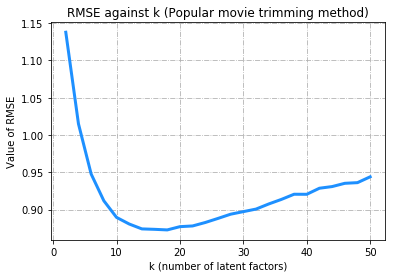

In [38]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming method

In [39]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        nmf.fit(trainset)
        testset_trim = UMT(testset)
        predictions = nmf.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 1.1714
RMSE: 1.1457
RMSE: 1.1740
RMSE: 1.1746
RMSE: 1.1559
RMSE: 1.1413
RMSE: 1.1524
RMSE: 1.1673
RMSE: 1.1229
RMSE: 1.1598
RMSE: 1.0952
RMSE: 1.0902
RMSE: 1.0740
RMSE: 1.0815
RMSE: 1.0670
RMSE: 1.0968
RMSE: 1.0752
RMSE: 1.0719
RMSE: 1.1217
RMSE: 1.0770
RMSE: 1.0547
RMSE: 1.0609
RMSE: 1.0459
RMSE: 1.0571
RMSE: 1.0557
RMSE: 1.0391
RMSE: 1.0680
RMSE: 1.0613
RMSE: 1.0351
RMSE: 1.0809
RMSE: 1.0343
RMSE: 1.0261
RMSE: 1.0422
RMSE: 1.0510
RMSE: 1.0286
RMSE: 1.0336
RMSE: 1.0317
RMSE: 1.0193
RMSE: 1.0161
RMSE: 1.0163
RMSE: 1.0153
RMSE: 1.0041
RMSE: 1.0142
RMSE: 0.9898
RMSE: 1.0446
RMSE: 1.0090
RMSE: 0.9961
RMSE: 1.0012
RMSE: 1.0197
RMSE: 1.0241
RMSE: 0.9834
RMSE: 1.0045
RMSE: 1.0085
RMSE: 1.0319
RMSE: 1.0077
RMSE: 0.9890
RMSE: 1.0145
RMSE: 0.9915
RMSE: 1.0035
RMSE: 0.9994
RMSE: 1.0051
RMSE: 0.9962
RMSE: 0.9757
RMSE: 0.9939
RMSE: 0.9898
RMSE: 0.9953
RMSE: 1.0041
RMSE: 0.9957
RMSE: 1.0134
RMSE: 0.9904
RMSE: 0.9839
RMSE: 0.9857
RMSE: 0.9972
RMSE: 0.9915
RMSE: 1.0022
RMSE: 1.0267
RMSE: 1.0112

The minimum average value of RMSE is: 0.9895832293650981


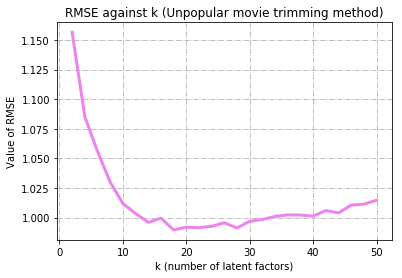

In [40]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='violet',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming method

In [41]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    nmf = NMF(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        nmf.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = nmf.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 1.2827
RMSE: 1.2677
RMSE: 1.0449
RMSE: 1.2119
RMSE: 1.2297
RMSE: 1.1084
RMSE: 1.1661
RMSE: 0.9677
RMSE: 1.0525
RMSE: 1.0234
RMSE: 0.8468
RMSE: 1.1165
RMSE: 1.0324
RMSE: 0.8260
RMSE: 0.8855
RMSE: 0.9190
RMSE: 1.0431
RMSE: 0.8156
RMSE: 1.0129
RMSE: 0.9402
RMSE: 0.6909
RMSE: 0.7850
RMSE: 0.8469
RMSE: 0.9731
RMSE: 0.8466
RMSE: 0.8928
RMSE: 0.8193
RMSE: 0.9391
RMSE: 1.0275
RMSE: 0.9692
RMSE: 0.8851
RMSE: 0.6911
RMSE: 0.9179
RMSE: 0.7688
RMSE: 1.0037
RMSE: 0.8764
RMSE: 0.8448
RMSE: 0.7686
RMSE: 0.7488
RMSE: 0.7662
RMSE: 0.7373
RMSE: 0.7937
RMSE: 0.8357
RMSE: 0.8082
RMSE: 0.8370
RMSE: 0.7447
RMSE: 0.7076
RMSE: 0.8496
RMSE: 0.9007
RMSE: 0.7736
RMSE: 0.7467
RMSE: 0.8921
RMSE: 0.7584
RMSE: 0.8570
RMSE: 0.7853
RMSE: 0.8621
RMSE: 0.7756
RMSE: 0.7586
RMSE: 0.6646
RMSE: 0.9246
RMSE: 0.9506
RMSE: 0.7703
RMSE: 0.8003
RMSE: 0.6493
RMSE: 0.7877
RMSE: 0.8504
RMSE: 0.8845
RMSE: 0.7411
RMSE: 0.9058
RMSE: 0.8283
RMSE: 0.7038
RMSE: 0.7924
RMSE: 0.9180
RMSE: 0.8436
RMSE: 0.7281
RMSE: 0.7499
RMSE: 0.7925

The minimum average value of RMSE is: 0.778166244577051


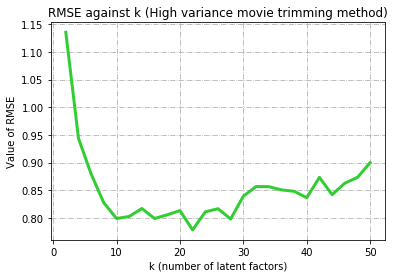

In [42]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

## Question 22:
Plot the ROC curves for the NNMF-based collaborative filter designed in question 17 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the optimal number of latent factors found in question 18. For each of the plots, also report the area under the curve (AUG) value.

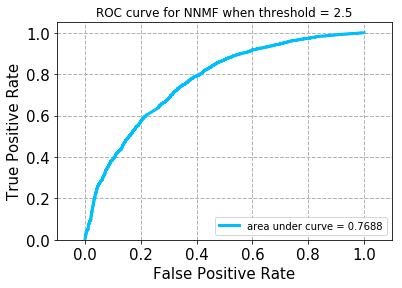

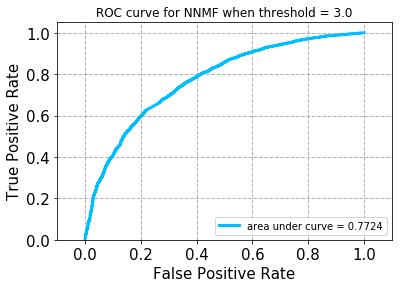

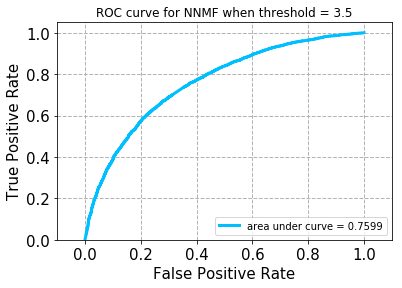

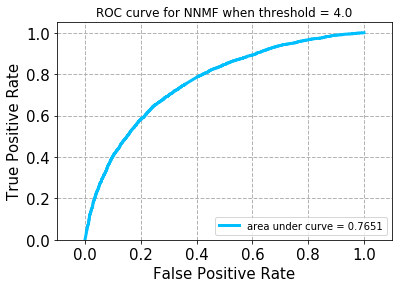

In [43]:
threshold = [2.5,3,3.5,4]
nmf = NMF(n_factors=20)
trainset, testset = train_test_split(data, test_size=.1)
predictions = nmf.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for NNMF when threshold = %2.1f' % thresh)

## Question 23:
Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V, where U represents the user-latent factors interaction and V represents te movie-latent factors interaction (use k = 20). For each column of V, sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies velong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?

In [44]:
nmf = NMF(n_factors=20)
nmf.fit(data.build_full_trainset())
U = nmf.pu
V = nmf.qi
movie_idx = np.argsort(V,axis=0)
movie_id = list(set(ratings[:,1]))
movie_id.sort(key=list(ratings[:,1]).index)
total = movie_idx.shape[0]
genre_id = 0
for i in range(20):
    genre_id += 1
    print('*'*40)
    print('The top 10 movies of genre',genre_id,'are:')
    for top in range(total-1,total-11,-1):
        print(movie_id[movie_idx[top,i]])     

****************************************
The top 10 movies of genre 1 are:
33834
1999
73042
89904
61350
1966
74754
26249
171
77688
****************************************
The top 10 movies of genre 2 are:
213
70994
7564
100714
95182
7116
3682
179819
49932
1014
****************************************
The top 10 movies of genre 3 are:
1194
1468
69644
3990
619
68073
121097
1483
67695
104863
****************************************
The top 10 movies of genre 4 are:
3837
4678
7842
430
4863
4850
104879
3018
4233
3841
****************************************
The top 10 movies of genre 5 are:
6140
7650
8035
6464
61350
2488
5427
3799
7115
1658
****************************************
The top 10 movies of genre 6 are:
998
4721
70687
3446
5222
5522
3494
166461
82
4703
****************************************
The top 10 movies of genre 7 are:
4733
4450
139642
165549
160565
96004
3089
2070
932
522
****************************************
The top 10 movies of genre 8 are:
130634
3404
6022
611
1587

## Question 24:
Design a MF with bias collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in stop sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 fold. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

In [78]:
from surprise import SVD

mae = []
rmse = []

for k in range(2,52,2):
    svd = SVD(n_factors=k)
    result_dict = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=10, 
                                 verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8558  0.8711  0.8719  0.8623  0.8775  0.8567  0.8809  0.8653  0.8632  0.8631  0.8668  0.0079  
MAE (testset)     0.6609  0.6673  0.6692  0.6623  0.6701  0.6614  0.6785  0.6664  0.6620  0.6652  0.6663  0.0051  
Fit time          3.14    2.98    3.34    2.72    2.94    3.24    3.38    3.23    3.28    3.07    3.13    0.20    
Test time         0.15    0.29    0.12    0.11    0.31    0.10    0.11    0.40    0.11    0.16    0.19    0.10    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8669  0.8805  0.8669  0.8640  0.8682  0.8620  0.8689  0.8671  0.8706  0.8570  0.8672  0.0058  
MAE (testset)     0.6652  0.6737  0.6671  0.6672  0.6665  0.6634  0.6680  0.6646  0.6

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8607  0.8696  0.8636  0.8582  0.8676  0.8536  0.8686  0.8724  0.8653  0.8746  0.8654  0.0062  
MAE (testset)     0.6651  0.6643  0.6624  0.6566  0.6683  0.6592  0.6642  0.6687  0.6689  0.6668  0.6644  0.0039  
Fit time          5.49    5.64    5.56    5.94    6.61    4.91    6.21    5.78    6.98    5.93    5.90    0.56    
Test time         0.13    0.28    0.24    0.11    0.11    0.08    0.11    0.10    0.24    0.13    0.15    0.07    
Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8679  0.8643  0.8630  0.8701  0.8677  0.8617  0.8726  0.8676  0.8582  0.8648  0.8658  0.0040  
MAE (testset)     0.6656  0.6657  0.6664  0.6685  0.6675  0.6624  0.6670  0.6657  0.6

Text(0.5,1,'MAE against #k of latent factors (MF with bias)')

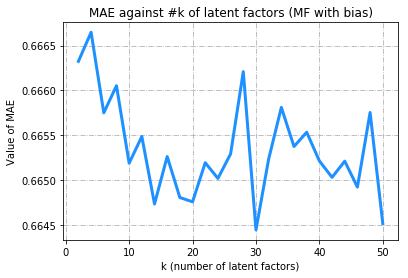

In [79]:
# plot 
x = range(2,52,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of MAE')
plt.title('MAE against #k of latent factors (MF with bias)')

Text(0.5,1,'RMSE against #k of latent factors (MF with bias)')

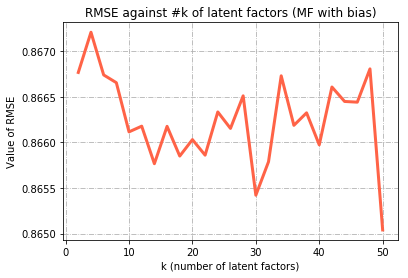

In [80]:
# plot 
x = range(2,52,2)
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against #k of latent factors (MF with bias)')

## Question 25:
Use the plot from question 24, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE.

In [81]:
# Find the optimal k and min value
K_rmse = range(2,52,2)[rmse.index(min(rmse))]
K_mae = range(2,52,2)[mae.index(min(mae))]
min_rmse = min(rmse)
min_mae = min(mae)
print('The optimal k for RMSE is:',K_rmse)
print('The minimum average RMSE value is:',min_rmse)
print('The optimal k for MAE is:',K_mae)
print('The minimum average MAE value is:',min_mae)

The optimal k for RMSE is: 50
The minimum average RMSE value is: 0.8650408150286013
The optimal k for MAE is: 30
The minimum average MAE value is: 0.6644484105171823


## Question 26+27+28:
Design a MF with bias collaborative filter to predict the ratings of the movies in the \[ popular movie trimmed, unpopluar movie trimmed, high variance movie trimmed \] test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.

### Popular movie trimming method

In [49]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = PMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.8455
RMSE: 0.8500
RMSE: 0.8597
RMSE: 0.8415
RMSE: 0.8636
RMSE: 0.8424
RMSE: 0.8480
RMSE: 0.8613
RMSE: 0.8497
RMSE: 0.8437
RMSE: 0.8502
RMSE: 0.8406
RMSE: 0.8423
RMSE: 0.8656
RMSE: 0.8550
RMSE: 0.8558
RMSE: 0.8468
RMSE: 0.8446
RMSE: 0.8469
RMSE: 0.8559
RMSE: 0.8317
RMSE: 0.8480
RMSE: 0.8583
RMSE: 0.8513
RMSE: 0.8558
RMSE: 0.8429
RMSE: 0.8623
RMSE: 0.8480
RMSE: 0.8448
RMSE: 0.8417
RMSE: 0.8483
RMSE: 0.8402
RMSE: 0.8556
RMSE: 0.8483
RMSE: 0.8479
RMSE: 0.8507
RMSE: 0.8575
RMSE: 0.8473
RMSE: 0.8473
RMSE: 0.8511
RMSE: 0.8621
RMSE: 0.8564
RMSE: 0.8626
RMSE: 0.8518
RMSE: 0.8408
RMSE: 0.8319
RMSE: 0.8448
RMSE: 0.8452
RMSE: 0.8408
RMSE: 0.8453
RMSE: 0.8466
RMSE: 0.8547
RMSE: 0.8524
RMSE: 0.8561
RMSE: 0.8448
RMSE: 0.8529
RMSE: 0.8368
RMSE: 0.8499
RMSE: 0.8573
RMSE: 0.8422
RMSE: 0.8450
RMSE: 0.8427
RMSE: 0.8484
RMSE: 0.8561
RMSE: 0.8496
RMSE: 0.8468
RMSE: 0.8531
RMSE: 0.8493
RMSE: 0.8510
RMSE: 0.8460
RMSE: 0.8507
RMSE: 0.8410
RMSE: 0.8438
RMSE: 0.8540
RMSE: 0.8556
RMSE: 0.8597
RMSE: 0.8305

The minimum average value of RMSE is: 0.8465675329963434


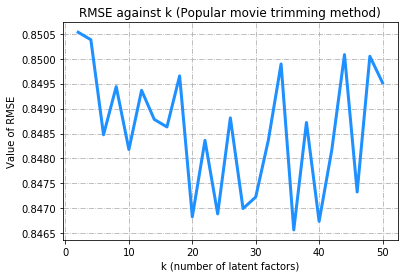

In [50]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Popular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### Unpopular movie trimming method

In [51]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = UMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.8944
RMSE: 0.9037
RMSE: 0.8870
RMSE: 0.9044
RMSE: 0.8866
RMSE: 0.9103
RMSE: 0.9099
RMSE: 0.9171
RMSE: 0.9141
RMSE: 0.9103
RMSE: 0.9059
RMSE: 0.9197
RMSE: 0.8998
RMSE: 0.9070
RMSE: 0.8902
RMSE: 0.8849
RMSE: 0.9025
RMSE: 0.8915
RMSE: 0.8976
RMSE: 0.9147
RMSE: 0.9151
RMSE: 0.8896
RMSE: 0.8888
RMSE: 0.9242
RMSE: 0.8822
RMSE: 0.9129
RMSE: 0.9022
RMSE: 0.9091
RMSE: 0.9035
RMSE: 0.9078
RMSE: 0.8970
RMSE: 0.9132
RMSE: 0.9029
RMSE: 0.8944
RMSE: 0.9042
RMSE: 0.8829
RMSE: 0.9207
RMSE: 0.8765
RMSE: 0.8968
RMSE: 0.9130
RMSE: 0.8917
RMSE: 0.8911
RMSE: 0.8834
RMSE: 0.9262
RMSE: 0.9057
RMSE: 0.9117
RMSE: 0.9157
RMSE: 0.9161
RMSE: 0.9099
RMSE: 0.8931
RMSE: 0.8849
RMSE: 0.9049
RMSE: 0.9101
RMSE: 0.8967
RMSE: 0.9043
RMSE: 0.9105
RMSE: 0.9000
RMSE: 0.9017
RMSE: 0.8925
RMSE: 0.9145
RMSE: 0.9205
RMSE: 0.8739
RMSE: 0.8909
RMSE: 0.9055
RMSE: 0.9030
RMSE: 0.9093
RMSE: 0.8977
RMSE: 0.8809
RMSE: 0.9275
RMSE: 0.8986
RMSE: 0.8889
RMSE: 0.8888
RMSE: 0.8941
RMSE: 0.9059
RMSE: 0.9197
RMSE: 0.9316
RMSE: 0.8976

The minimum average value of RMSE is: 0.9001695506555052


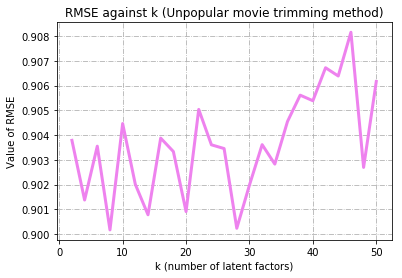

In [52]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='violet',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (Unpopular movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

### High variance movie trimming method

In [53]:
# define a cross-validation iterator
kf = KFold(n_splits=10)

# Construct a knn filter
rmse = []
for k in range(2,52,2):
    svd = SVD(n_factors=k)
    rmse_i = []
    for trainset, testset in kf.split(data):

        # train and test algorithm.
        svd.fit(trainset)
        testset_trim = HVMT(testset)
        predictions = svd.test(testset_trim)

        # Compute and print Root Mean Squared Error
        rmse_i.append(accuracy.rmse(predictions, verbose=True))
    rmse.append(np.mean(rmse_i))

RMSE: 0.8498
RMSE: 0.8620
RMSE: 0.7192
RMSE: 0.7729
RMSE: 0.8020
RMSE: 0.8253
RMSE: 0.8055
RMSE: 0.5647
RMSE: 0.8741
RMSE: 0.6728
RMSE: 0.7375
RMSE: 0.6633
RMSE: 0.7502
RMSE: 0.8734
RMSE: 0.7771
RMSE: 0.8486
RMSE: 0.8196
RMSE: 0.7779
RMSE: 0.8574
RMSE: 0.7307
RMSE: 0.7357
RMSE: 0.6934
RMSE: 0.9152
RMSE: 0.8539
RMSE: 0.6050
RMSE: 0.9841
RMSE: 0.8121
RMSE: 0.8585
RMSE: 0.7485
RMSE: 0.6340
RMSE: 0.8740
RMSE: 0.8682
RMSE: 0.6942
RMSE: 0.8581
RMSE: 0.8333
RMSE: 0.7144
RMSE: 0.8145
RMSE: 0.7174
RMSE: 0.7029
RMSE: 0.7203
RMSE: 0.7792
RMSE: 0.8678
RMSE: 0.6660
RMSE: 0.8273
RMSE: 0.8299
RMSE: 0.7304
RMSE: 0.7595
RMSE: 0.7856
RMSE: 0.8411
RMSE: 0.7716
RMSE: 0.7683
RMSE: 0.7593
RMSE: 0.6672
RMSE: 0.6996
RMSE: 0.8715
RMSE: 0.8584
RMSE: 0.6888
RMSE: 0.8286
RMSE: 0.7691
RMSE: 0.9541
RMSE: 0.7586
RMSE: 0.7556
RMSE: 0.6627
RMSE: 0.8194
RMSE: 0.8227
RMSE: 0.7410
RMSE: 0.6315
RMSE: 0.7940
RMSE: 0.8360
RMSE: 0.7118
RMSE: 0.7204
RMSE: 0.6552
RMSE: 0.8870
RMSE: 0.8649
RMSE: 0.7308
RMSE: 0.8419
RMSE: 0.6494

The minimum average value of RMSE is: 0.7459481762000919


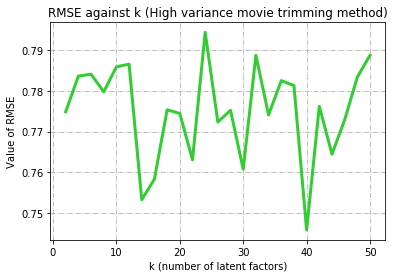

In [54]:
# show time (plot)
x = range(2,52,2)

plt.plot(x,rmse,color='limegreen',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k (number of latent factors)')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (High variance movie trimming method)')
print('The minimum average value of RMSE is:',min(rmse))

## Question 29:
Plot the ROC curves for the MF with bias collaborative filter designed in question 24 for threshold values \[2.5, 3, 3.5, 4\]. For the ROC plotting use the optimal number of latent factors found in question 25. For each of the plots, also report the area under the curve (AUC) value.

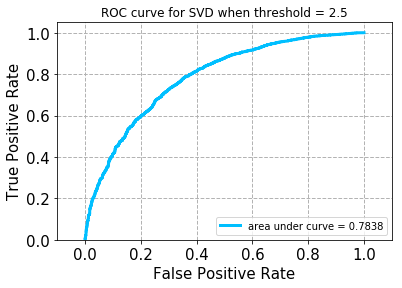

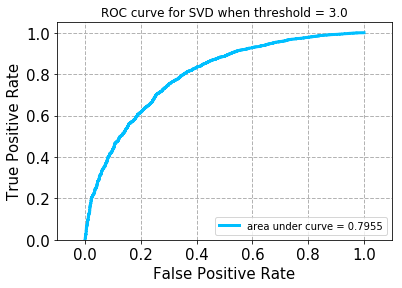

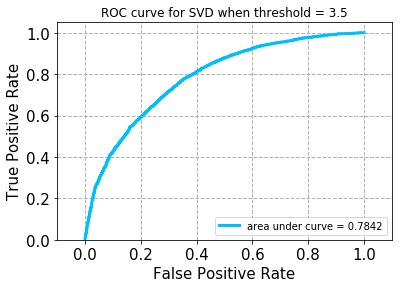

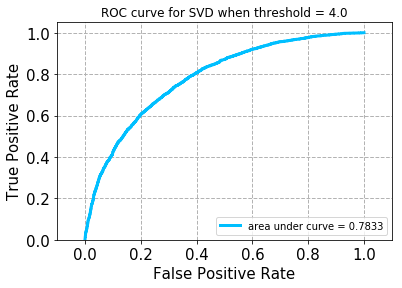

In [87]:
threshold = [2.5,3,3.5,4]
svd = SVD(n_factors=30)
trainset, testset = train_test_split(data, test_size=.1)
predictions = svd.fit(trainset).test(testset)
for thresh in threshold:
    y_pred, y_true = get_labels(predictions, thresh)
    fpr,tpr,_ = roc_curve(y_true, y_pred)
    plot_roc(fpr,tpr)
    plt.title('ROC curve for SVD when threshold = %2.1f' % thresh)

## Question 30:
Design a naive collaborative filter to predict the ratings the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross-validation. Compute the average RMSE by averaging thee RMSE across all 10 folds. Report the average RMSE.

In [56]:
from surprise import AlgoBase

class NaiveFilter(AlgoBase):
    def __init__(self):
        AlgoBase.__init__(self)
        
    def estimate(self, u, i):
        return np.mean([rating for (_, rating) in self.trainset.ur[u]])

In [57]:
naiveCF = NaiveFilter()
output = cross_validate(naiveCF, data, measures=['RMSE'], cv=10)
    
avg_rmse = np.mean(output['test_rmse'])
    
print("Avg RMSE: ", avg_rmse)

Avg RMSE:  0.9410964549697685


## Question 31+32+33:
Design a naive collaborative filter to predict the ratings of the movies in the \[popular movie trimmed, unpopular movie trimmed, high variance movie trimmed\] test set and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

### Popular movie trimmed method

In [58]:
from surprise import accuracy
kf = KFold(n_splits=10)

rmse_i = list()

for trainset, testset in kf.split(data):
    naiveCF = NaiveFilter()
    naiveCF.fit(trainset)
    testset_trim = PMT(testset)

    predictions = naiveCF.test(testset_trim)

    rmse_i.append(accuracy.rmse(predictions, verbose=True))

avg_rmse = np.mean(rmse_i)
print("Avg RMSE:", avg_rmse)

RMSE: 0.9381
RMSE: 0.9550
RMSE: 0.9382
RMSE: 0.9338
RMSE: 0.9227
RMSE: 0.9111
RMSE: 0.9087
RMSE: 0.9475
RMSE: 0.9230
RMSE: 0.9250
Avg RMSE: 0.9303045438426659


### Unpopular movie trimming method

In [59]:
kf = KFold(n_splits=10)

rmse_i = list()

for trainset, testset in kf.split(data):
    naiveCF = NaiveFilter()
    naiveCF.fit(trainset)
    testset_trim = UMT(testset)

    predictions = naiveCF.test(testset_trim)

    rmse_i.append(accuracy.rmse(predictions, verbose=True))

avg_rmse = np.mean(rmse_i)
print("Avg RMSE:", avg_rmse)

RMSE: 0.9607
RMSE: 0.9294
RMSE: 0.9559
RMSE: 0.9660
RMSE: 0.9626
RMSE: 0.9656
RMSE: 0.9407
RMSE: 0.9880
RMSE: 0.9616
RMSE: 0.9788
Avg RMSE: 0.9609220387549572


### High variance movie trimming method

In [60]:
kf = KFold(n_splits=10)

rmse_i = list()

for trainset, testset in kf.split(data):
    naiveCF = NaiveFilter()
    naiveCF.fit(trainset)
    testset_trim = HVMT(testset)

    predictions = naiveCF.test(testset_trim)

    rmse_i.append(accuracy.rmse(predictions, verbose=True))

avg_rmse = np.mean(rmse_i)
print("Avg RMSE:", avg_rmse)

RMSE: 0.9028
RMSE: 0.9370
RMSE: 0.8316
RMSE: 0.7496
RMSE: 0.9091
RMSE: 0.8509
RMSE: 0.8095
RMSE: 0.7696
RMSE: 0.8716
RMSE: 0.8149
Avg RMSE: 0.8446559041009639


## Question 34:
Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.

Computing the pearson similarity matrix...
Done computing similarity matrix.


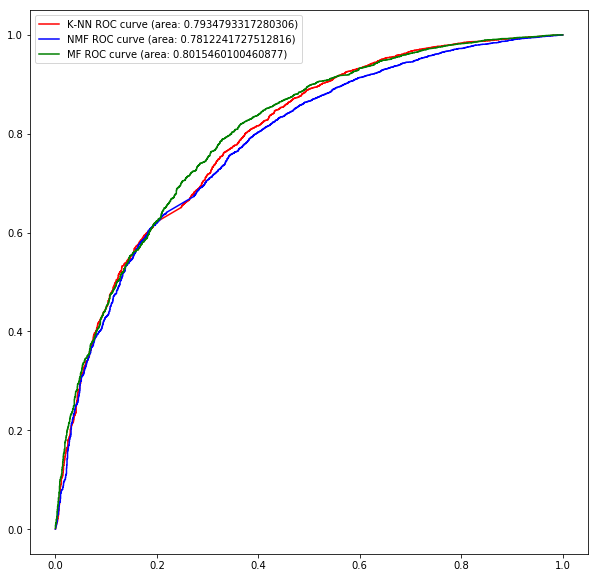

In [89]:
from surprise import NMF
from surprise import SVD
from sklearn import metrics
from surprise.model_selection import KFold

thres = 3
kf = KFold(n_splits=10)
for train, test in kf.split(data):
    trainset, testset = train, test
    break

knn = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=True)
knn.fit(trainset)
pred = knn.test(testset)

plt.figure(figsize=(10, 10))

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(x, y, color='red')

knn_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

nmf = NMF(n_factors=20)
nmf.fit(trainset)
pred = nmf.test(testset)

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)
plt.plot(x, y, color='blue')

nmf_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

svd = SVD(n_factors=30)
svd.fit(trainset)
pred = svd.test(testset)

y_pred, y_true = get_labels(pred, thres)
x, y, _ = metrics.roc_curve(y_true=y_true, y_score=y_pred, pos_label=1)

mf_area = metrics.roc_auc_score(y_true=y_true, y_score=y_pred)

plt.plot(x, y, color='green')

plt.legend(labels = ['K-NN ROC curve (area: ' + str(knn_area) + ')', 
                     'NMF ROC curve (area: ' + str(nmf_area) + ')', 
                     'MF ROC curve (area: ' + str(mf_area) + ')'])

## Question 35:

Precision and Recall are defined by the mathematical expressions given by equations 12 and 13 respectively. Please explain the meaning of precision and recall in your own words.

The answer is shown on the report.


## Question 36:
Plot average precision (Y-axis) against t (X-axis) for the rnking obtained using k-NN collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use the k found in question 11 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

**How to compute precision@k and recall@k (Provided in the surprise official website** https://surprise.readthedocs.io/en/stable/FAQ.html?highlight=precision)

In [70]:
def precision_recall_at_k(predictions, k=10, threshold=3):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    quality = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
        
        # Is the user qualified for calculating
       # quality[uid] = 1 if n_rel>0 and len(user_ratings)>=k else 0
       # precisions[uid] = precisions[uid] if n_rel>0 and len(user_ratings)>=k else 0
       # recalls[uid] = recalls[uid] if n_rel>0 and len(user_ratings)>=k else 0

    return precisions, recalls#, quality

In [71]:
from collections import defaultdict
kf = KFold(n_splits=10)

avg_precisions = list()
avg_recalls = list()

for i in range(1, 26):
    algo = KNNWithMeans(k=20, min_k=1, sim_options=sim, verbose=False)
    temp_precision = list()
    temp_recall = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=i)
       # precisions, recalls, quality = precision_recall_at_k(predictions, k=i)

        # Precision and recall can then be averaged over all users
        temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
        temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))
        #temp_precision.append(sum(prec for prec in precisions.values()) / sum(q for q in quality.values()))
        #temp_recall.append(sum(rec for rec in recalls.values()) / sum(q for q in quality.values()))
    
    avg_precisions.append(sum(temp_precision) / len(temp_precision))
    avg_recalls.append(sum(temp_recall) / len(temp_recall))

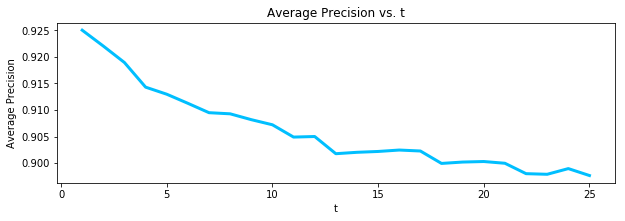

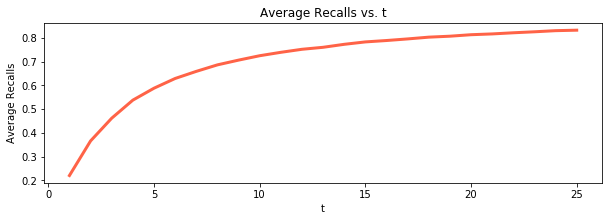

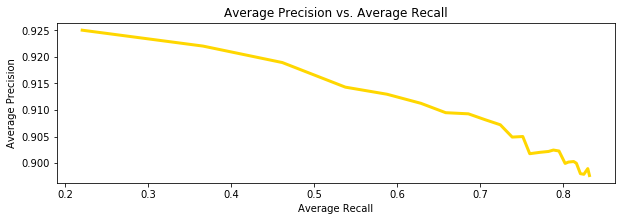

In [72]:
import itertools


plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title("Average Precision vs. t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

plt.figure(figsize=(10, 10))

plt.subplot(3,1,2)
plt.title("Average Recalls vs. t")
plt.ylabel("Average Recalls")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

plt.figure(figsize=(10, 10))

plt.subplot(3,1,3)
plt.title("Average Precision vs. Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(*plot_list,linewidth=3,color='gold')

knn_precision = avg_precisions
knn_recall = avg_recalls


## Question 37:

Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using NNMF-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 18 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.


In [73]:
from collections import defaultdict
kf = KFold(n_splits=10)

avg_precisions = list()
avg_recalls = list()

for i in range(1, 26):
    algo = NMF(n_factors=20)
    temp_precision = list()
    temp_recall = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=4)
        #precisions, recalls, quality = precision_recall_at_k(predictions, k=i, threshold=4)

        # Precision and recall can then be averaged over all users
        temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
        temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))
        #temp_precision.append(sum(prec for prec in precisions.values()) / sum(q for q in quality.values()))
        #temp_recall.append(sum(rec for rec in recalls.values()) / sum(q for q in quality.values()))
    
    avg_precisions.append(sum(temp_precision) / len(temp_precision))
    avg_recalls.append(sum(temp_recall) / len(temp_recall))

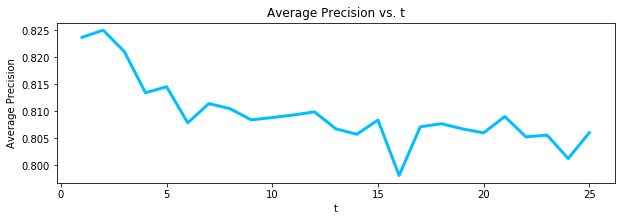

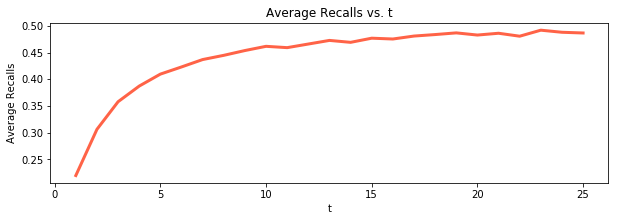

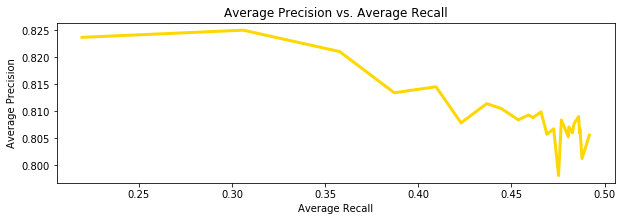

In [74]:
import itertools


plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title("Average Precision vs. t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

plt.figure(figsize=(10, 10))

plt.subplot(3,1,2)
plt.title("Average Recalls vs. t")
plt.ylabel("Average Recalls")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

plt.figure(figsize=(10, 10))

plt.subplot(3,1,3)
plt.title("Average Precision vs. Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(*plot_list,linewidth=3,color='gold')

nmf_precision = avg_precisions
nmf_recall = avg_recalls

## Question 38:
Plot average precision (Y-axis) against t (X-axis) for the ranking obtained using MF with bias-based collaborative filter predictions. Also, plot the average recall (Y-axis) against t (X-axis) and average precision (Y-axis) against average recall (X-axis). Use optimal number of latent factors found in question 25 and sweep t from 1 to 25 in step sizes of 1. For each plot, briefly comment on the shape of the plot.

In [75]:
from collections import defaultdict
kf = KFold(n_splits=10)

avg_precisions = list()
avg_recalls = list()

for i in range(1, 26):
    algo = SVD(n_factors=26)
    temp_precision = list()
    temp_recall = list()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=i, threshold=4)
        #precisions, recalls, quality = precision_recall_at_k(predictions, k=i, threshold=4)

        # Precision and recall can then be averaged over all users
        temp_precision.append(sum(prec for prec in precisions.values()) / len(precisions))
        temp_recall.append(sum(rec for rec in recalls.values()) / len(recalls))
        #temp_precision.append(sum(prec for prec in precisions.values()) / sum(q for q in quality.values()))
        #temp_recall.append(sum(rec for rec in recalls.values()) / sum(q for q in quality.values()))
    
    avg_precisions.append(sum(temp_precision) / len(temp_precision))
    avg_recalls.append(sum(temp_recall) / len(temp_recall))

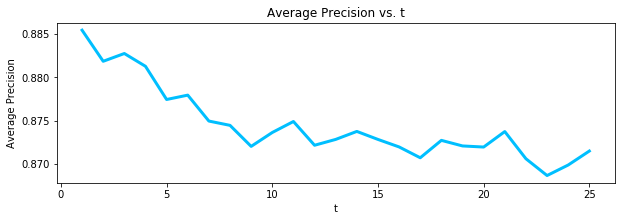

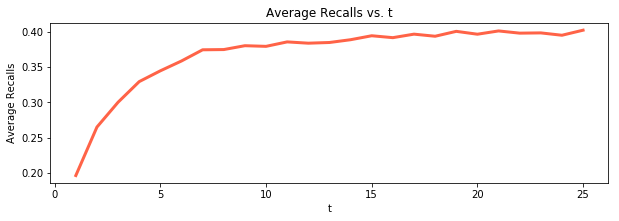

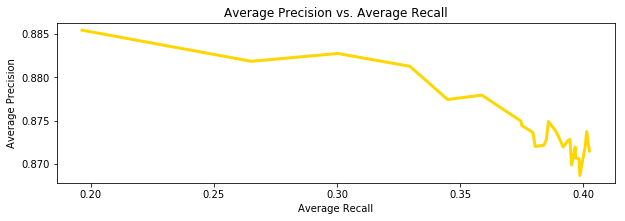

In [76]:
import itertools


plt.figure(figsize=(10, 10))

plt.subplot(3,1,1)
plt.title("Average Precision vs. t")
plt.ylabel("Average Precision")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_precisions,linewidth=3,color='deepskyblue')

plt.figure(figsize=(10, 10))

plt.subplot(3,1,2)
plt.title("Average Recalls vs. t")
plt.ylabel("Average Recalls")
plt.xlabel("t")
plt.plot([i for i in range(1, 26)], avg_recalls,linewidth=3,color='tomato')

plot_list=zip(*sorted(zip(*(avg_recalls, avg_precisions))))

plt.figure(figsize=(10, 10))

plt.subplot(3,1,3)
plt.title("Average Precision vs. Average Recall")
plt.ylabel("Average Precision")
plt.xlabel("Average Recall")
plt.plot(*plot_list,linewidth=3,color='gold')

mf_precision = avg_precisions
mf_recall = avg_recalls

## Question 39:

Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recom- mendation list generated using k-NN, NNMF, and MF with bias predictions.


Text(0.5,1,'Precision-Recall')

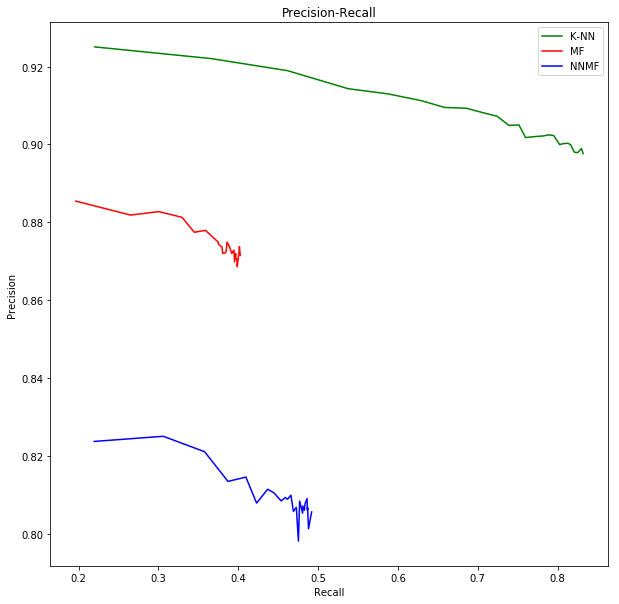

In [77]:
plt.figure(figsize=(10, 10))

plot_list=zip(*sorted(zip(*(knn_recall, knn_precision))))
plt.plot(*plot_list, color='green')

plot_list=zip(*sorted(zip(*(mf_recall, mf_precision))))
plt.plot(*plot_list, color='red')

plot_list=zip(*sorted(zip(*(nmf_recall, nmf_precision))))
plt.plot(*plot_list, color='blue')

plt.legend(labels = ['K-NN', 'MF', 'NNMF'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall')